Sentiment Analysis

1. Apply sentiment analysis to the news content to gauge positive, negative, or neutral sentiments about players.
2. Use libraries like TextBlob, VADER, or spaCy.

In [ ]:
!pip install pandas textblob vaderSentiment spacy
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab 

In [ ]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the news data
news_df = pd.read_csv('/content/drive/MyDrive/nlp/all_feed_all_docs_clean_token.csv')

In [ ]:
news_df.shape

(212853, 4)

In [ ]:
news_df.head()

,names,clubs,fee,token
0,"Alisson, Alisson, Ederson, Arijanet Muric - Bu...","Premier League, Ederson and AlissonLiverpool, ...","20m/£17.3, 20m/£17.3, 20, 50m/£43.4, 43.8, 60m...",top ten valuable Premier League goalkeeper rev...
1,"Marcus Rashford, Rashford, HTML5, Maintenance,...","Manchester United, Sun, United, Rolls-Royce, U...","700,000",England striker involved crash grandmother yes...
2,"Main NavigationSkip, Erik, Roy Hodgson, Erik, ...","United, United, BST, Sky Sports, Newcastle Uni...",NaN,Skip Main NavigationSkip contentHow follow Uni...
3,"Erik, Nerazzurri, David De Gea, Man Utd, Jan O...","Manchester United, LaLiga, Old Trafford, Inter...","43.8, 47.8, 50, 50, 43.6",Manchester United reportedly weighing January ...
4,"Mateo Kovacic, Kovacic, Kovacic, Mateo Kovacic...","City, Red Star Belgrade, the Champions League,...",£30 million,Pep Guardiola gave injury update Manchester Ci...


In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the TextBlob sentiment polarity
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity


# Function to get the VADER sentiment polarity
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [ ]:
# Apply TextBlob sentiment analysis
news_df['textblob_sentiment'] = news_df['token'].apply(get_textblob_sentiment)

In [ ]:
# Apply VADER sentiment analysis
news_df['vader_sentiment'] = news_df['token'].apply(get_vader_sentiment)

# Compare TextBlob and VADER sentiments
print(news_df[['token', 'textblob_sentiment', 'vader_sentiment']].head())

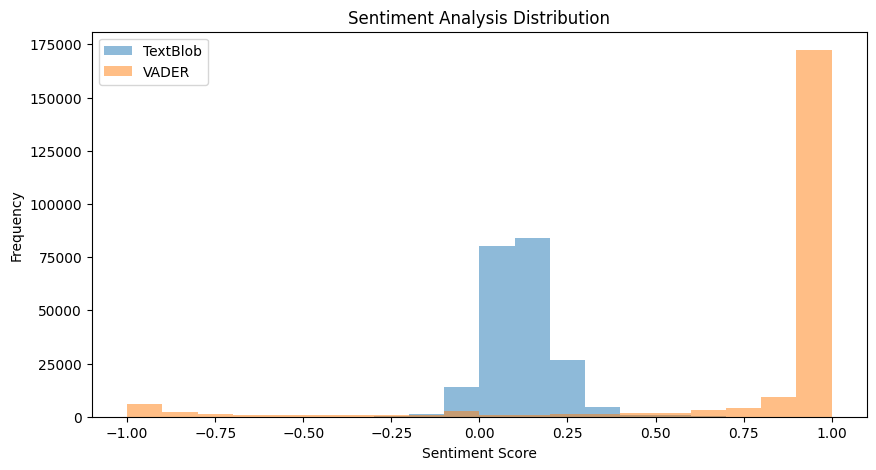

In [ ]:
# Analyze the distribution of sentiments
plt.figure(figsize=(10, 5))
plt.hist(news_df['textblob_sentiment'], bins=20, alpha=0.5, label='TextBlob')
plt.hist(news_df['vader_sentiment'], bins=20, alpha=0.5, label='VADER')
plt.legend(loc='upper left')
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
news_df.to_csv('/content/drive/MyDrive/nlp data/Data/all_feed_all_docs_sentiment.csv', index=False)

In [ ]:
news_df.head()

,names,clubs,fee,token,textblob_sentiment,vader_sentiment
0,"Alisson, Alisson, Ederson, Arijanet Muric - Bu...","Premier League, Ederson and AlissonLiverpool, ...","20m/£17.3, 20m/£17.3, 20, 50m/£43.4, 43.8, 60m...","['top', 'ten', 'valuable', 'premier', 'league'...",0.150402,0.9989
1,"Marcus Rashford, Rashford, HTML5, Maintenance,...","Manchester United, Sun, United, Rolls-Royce, U...","700,000","['england', 'striker', 'involved', 'crash', 'g...",0.102632,0.9496
2,"Main NavigationSkip, Erik, Roy Hodgson, Erik, ...","United, United, BST, Sky Sports, Newcastle Uni...",NaN,"['skip', 'main', 'navigationskip', 'contenthow...",0.116795,0.9976
3,"Erik, Nerazzurri, David De Gea, Man Utd, Jan O...","Manchester United, LaLiga, Old Trafford, Inter...","43.8, 47.8, 50, 50, 43.6","['manchester', 'united', 'reportedly', 'weighi...",0.088997,0.9930
4,"Mateo Kovacic, Kovacic, Kovacic, Mateo Kovacic...","City, Red Star Belgrade, the Champions League,...",£30 million,"['pep', 'guardiola', 'gave', 'injury', 'update...",0.144121,0.9085
